# Analyse des Correspondances Multiples : le cas de l'ergatif en warlipiri 🇫🇷

[Xiaoou WANG](https://xiaoouwang.github.io)

Dans ce tutoriel nous explorons le jeu de données `lwarlipiri.rds` à l’aide d’une méthode exploratoire multivariée adaptée afin d'investiguer dans quelle mesure l’utilisation du marqueur de cas ergatif `CaseMarking` est liée aux variables suivantes :

* l’animéité du sujet `AnimacyOfSubject`
* l’ordre des mots `WordOrder`
* l’âge du locuteur `AgeGroup`

Nous allons utiliser `FactoMineR` et `factoextra`, ce dernier offrant des graphes plus intuitifs

In [1]:
options(tidyverse.quiet = TRUE) # omettre les warnings pour ne pas encombrer le document
library("factoextra")
library("FactoMineR")
library("tidyverse")
df <- readRDS(url("https://bit.ly/3qR6KkX"))
df <- df %>% select(AgeGroup:AnimacyOfSubject) # garder les varialbes pertinentes
str(df)

Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



'data.frame':	347 obs. of  4 variables:
 $ AgeGroup        : Factor w/ 2 levels "adult","child": 2 2 2 2 2 2 2 2 2 2 ...
 $ CaseMarking     : Factor w/ 2 levels "ergative","other": 1 1 1 1 1 1 1 1 1 1 ...
 $ WordOrder       : Factor w/ 2 levels "subInitial","subNotInitial": 2 1 1 2 1 1 1 2 1 2 ...
 $ AnimacyOfSubject: Factor w/ 2 levels "animate","inanimate": 1 1 1 1 1 2 2 1 1 2 ...


## Pourquoi MCA

Nous choisissons l'analyse des correspondances multiples (MCA) comme méthode car dans leur forme la plus classique `PCA` s'applique surtout aux variables continues, `CA` à une table de contingence et `MCA` à une table de variables catégorielles comme c'est le cas ici, d'autant plus que le nombre de facteurs par variable n'est pas élevé.

## Table de co-occurrence

Après maintes explorations, nous avons trouvé une cooccurrence de comptage très pratique. Nous procédons donc à la construction d'un tel tableau.

On produit aussi le tableau en utilisant des proportions.

In [2]:
t1 = table(df$CaseMarking,df$AgeGroup)
t2 = table(df$CaseMarking,df$WordOrder)
t3 = table(df$CaseMarking,df$AnimacyOfSubject)
t.total = cbind(t1,t2,t3)
t.total
# get total number of ergative and other
nb.ergative = nrow(df[df$CaseMarking=="ergative",])
nb.other = nrow(df[df$CaseMarking=="other",])
# divide each number by the total
data.col.totals <- cbind(t.total, c(nb.ergative,nb.other)) 
colnames(data.col.totals)[7] <- "row total" 
data.col.totals[1,] = data.col.totals[1,]/nb.ergative 
data.col.totals[2,] = data.col.totals[2,]/nb.other
cat("Tableau 1\n\n")
data.col.totals
# get the proportional table respect to columns
col.profiles <-prop.table(as.matrix(t.total), margin=2)
col.profiles <- rbind(col.profiles, colSums(col.profiles))
rownames(col.profiles)[3] <- "column total"
cat("\n\nTableau 2\n\n")
col.profiles

,adult,child,subInitial,subNotInitial,animate,inanimate
ergative,165,127,195,97,244,48
other,22,33,41,14,39,16


Tableau 1



,adult,child,subInitial,subNotInitial,animate,inanimate,row total
ergative,0.5650685,0.4349315,0.6678082,0.3321918,0.8356164,0.1643836,1
other,0.4000000,0.6000000,0.7454545,0.2545455,0.7090909,0.2909091,1




Tableau 2



,adult,child,subInitial,subNotInitial,animate,inanimate
ergative,0.8823529,0.79375,0.8262712,0.8738739,0.8621908,0.75
other,0.1176471,0.20625,0.1737288,0.1261261,0.1378092,0.25
column total,1.0000000,1.00000,1.0000000,1.0000000,1.0000000,1.00


## Quelques remarques issues des tableaux de proportion

Il est à noter que les remarques suivantes ne s'appliquent qu'aux données de ce tutoriel.

1. L'usage de l'ergatif est plus fréquent chez l'adulte que chez l'enfant, ce qui n'est pas le cas d'other. Si l'on regarde le tableau 2, les adultes utilisent plus l'ergatif qu'other, les enfants aussi. Cependant cette préférence est plus marquée chez l'adulte.

2. L'ergatif et l'other (les autres cas) s'utilisent plus fréquemment en subInitial que subNotInitial. Si l'on regarde le tableau 2, la préférence d'ergative en subNotInitial est plus marquée qu'en subInitial.

3. L'ergatif et l'other s'utilisent plus fréquemment en animate qu'en inanimate. L'ergative est plus lié à animate qu'other si l'on regarde le tableau 2.

## Que nous dit MCA

### Choix des dimensions

Si l'on regarde les valeurs propres et les pourcentage de variance, il semble que toutes les quatres dimensions sont importantes. La discontinuité est à peine observable. La difficulté de focaliser sur uniquement 2 dimensions survient assez fréquemment en MCA.

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,0.2952060,29.52060,29.52060
Dim.2,0.2645395,26.45395,55.97456
Dim.3,0.2470208,24.70208,80.67664
Dim.4,0.1932336,19.32336,100.00000


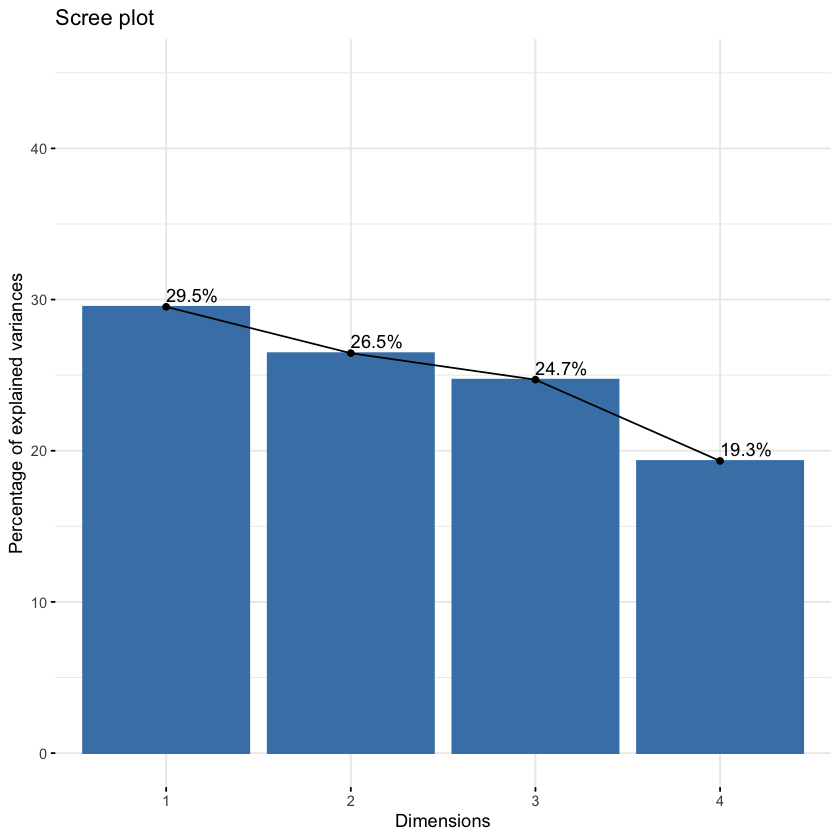

In [3]:
mca.object <- MCA(df, graph=FALSE)
eig.val <- get_eigenvalue(mca.object)
eig.val
fviz_screeplot(mca.object, addlabels = TRUE, ylim = c(0, 45))

Pour mieux trancher sur le choix des dimensions, nous visualisons aussi les contributions et qualités de chaque catégorie.

In [4]:
var <- get_mca_var(mca.object)
# Cos2: quality on the factor map
var$cos2
# Contributions to the principal components
var$contrib

,Dim 1,Dim 2,Dim 3,Dim 4
adult,0.31235074,0.00824843,0.53708810,0.1423127
child,0.31235074,0.00824843,0.53708810,0.1423127
ergative,0.46272978,0.23373604,0.01939376,0.2841404
other,0.46272978,0.23373604,0.01939376,0.2841404
subInitial,0.05888853,0.73068770,0.04486426,0.1655595
subNotInitial,0.05888853,0.73068770,0.04486426,0.1655595
animate,0.34685511,0.08548600,0.38673727,0.1809216
inanimate,0.34685511,0.08548600,0.38673727,0.1809216


,Dim 1,Dim 2,Dim 3,Dim 4
adult,12.196854,0.3594274,25.0635418,8.489687
child,14.255073,0.4200808,29.2930145,9.922322
ergative,6.211199,3.5011305,0.3111011,5.826714
other,32.975820,18.5878203,1.6516640,30.934552
subInitial,1.595288,22.0889316,1.4524475,6.851806
subNotInitial,3.391783,46.9638545,3.0880865,14.567804
animate,5.417680,1.4900297,7.2189316,4.317163
inanimate,23.956304,6.5887251,31.9212131,19.089953


Nous voyons bien qu'ergative et other contribuent peu à la dimension 3 (avec une mauvaise qualité en plus) et que les contributions globales des catégories sur la dimension 4 sont finalement assez faibles. Nous décidons donc de nous focaliser quand même sur les deux  premières dimensions.

### Corrélation entre variables et dimensions

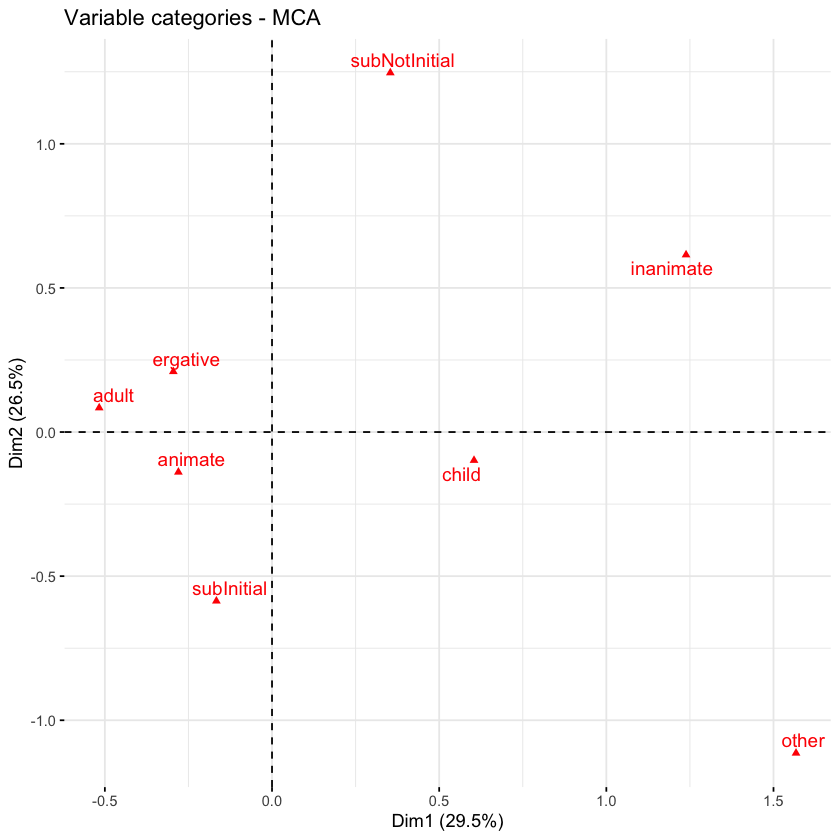

In [5]:
fviz_mca_var(mca.object, 
               repel = TRUE, # Avoid text overlapping (slow if many point)
               ggtheme = theme_minimal())

Vous voyez bien que sur la dimension 1 ergative est lié à `adult`, `animate` et `subInitial`, se différenciant nettement d'other. Sur la dimension 2 ergative est toujours plus proche de `adult`, mais se regroupe avec `subNotInitial et inanimate` cette fois-ci. Pour savoir quelle dimension regarder nous avons besoin de savoir les contributions et qualités de chaque catégorie à ces deux dimensions. Nous avons déjà abordé ce point plus haut, ici nous utilisons des graphes pour mieux comprendre cette question.

Le graphe suivant permet de savoir les corrélations des variables avec chaque dimension. Vous voyez que la dimension 1 est surtout corrélée avec Animacy, Age et CaseMarking et la dimension 2 avec WordOrder. 


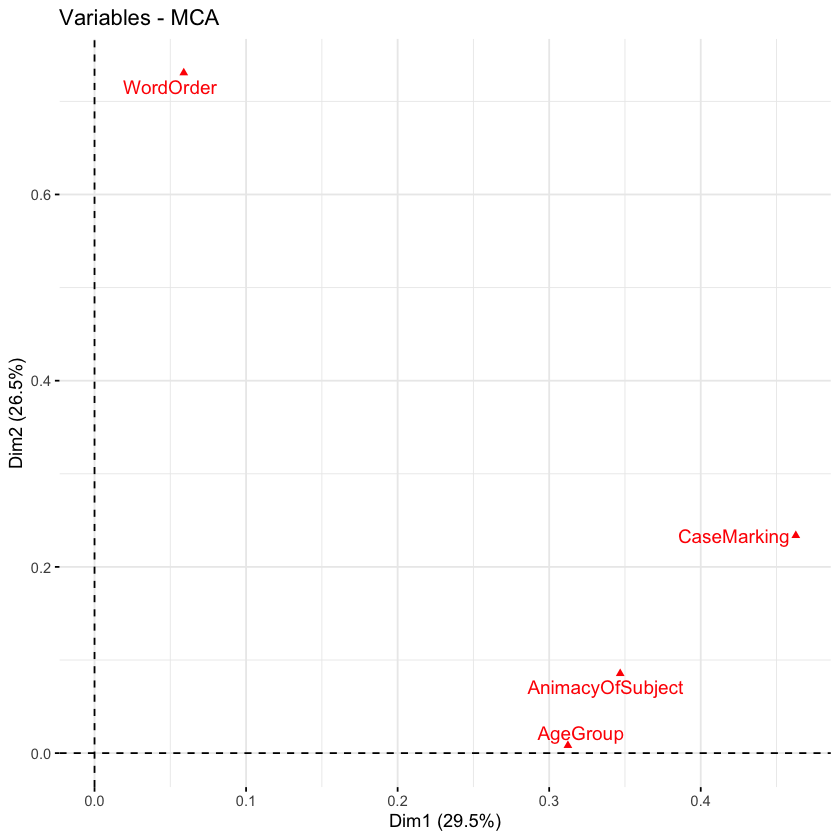

In [6]:
fviz_mca_var(mca.object, choice = "mca.cor", 
            repel = TRUE, # Avoid text overlapping (slow)
            ggtheme = theme_minimal())

Combinant les informations des tableaux et de MCA, nous arrivons aux conclusions suivantes :

1. Au niveau de l'âge du locuteur c'est surtout la dimension 1 qu'il faut regarder,  l'utilisation de l'ergatif est surtout liée à l'adulte, contrairement aux autres cas qui sont plutôt liés à l'enfant.

2. Au niveau de l'ordre des mots c'est plutôt la dimension 2 qu'il faut regarder. L'ergatif est plus fortement lié à subNotInitial qu'à subInitial par rapport à other. Cependant l'ergatif et les autres cas sont tous utilisés plus souvent en subInitial, ce qui est très visible sur les tableaux mais moins sur le graphe de MCA.

3. Au niveau de l'animéité du sujet, l'ergatif et les autres cas sont tous utilisés plus fréquemment quand le sujet est animé, ce qui, encore une fois, n'est pas facile à visualiser en MCA. Cependant sur MCA il est plus facile de voir que l'ergatif est plus fortement lié au sujet animé que les autres cas.

Vu que les contributions de animate et d'inanimate sont grandes sur la dimension 3, nous décidons de regarder aussi cette dimension.

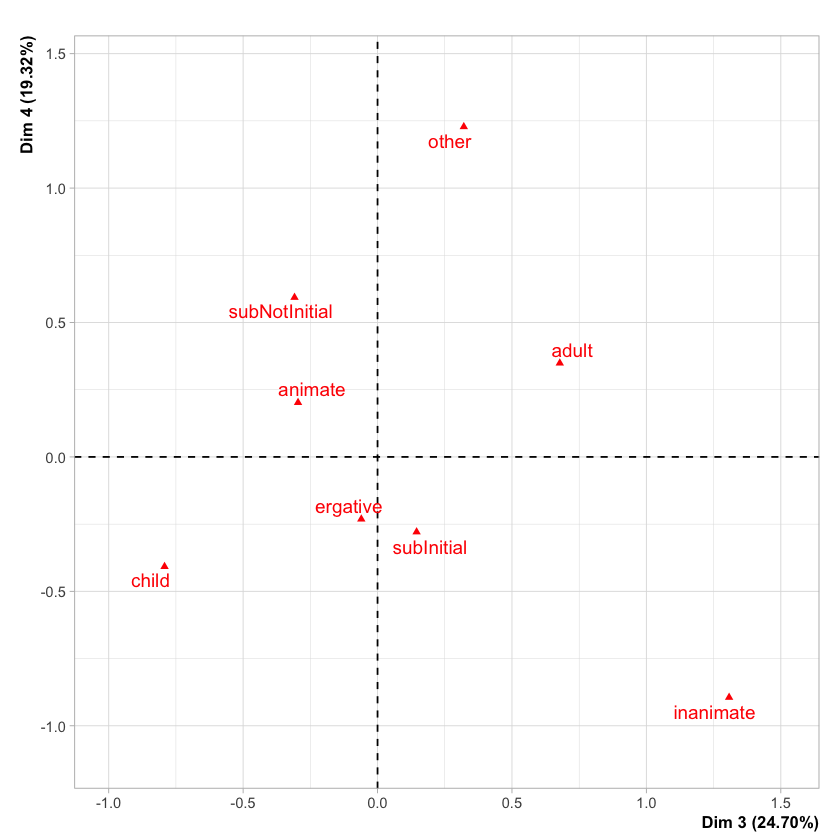

In [7]:
plot(mca.object, axes=3:4, invisible="ind", title="")

Effectivement ergative et other sont tous relativement proches d'animate, cependant comme on a évoqué plus haut, les contributions d'ergative et d'other sont petites au niveau de la dimension 3, rendant l'interprétation difficile.

4. En guise de remarque finale, nous trouvons que quand les variables ne sont pas très nombreuses (comme c'est le cas ici), les tableaux de proportions sont plus faciles à interpréter que MCA. Nous pensons que le nombre limité de variables de cet exercice a quelque peu réduit l'intérêt de l'usage de MCA mais il est toujours d'intéressant d'avoir des graphes de MCA à ses côtés même lorque les tableaux montrent des tendances relativement nettes.

Enfin, nous voudrions aussi montrer l'utilité la fonction unique de MCA qui consiste à comparer les catégories au sein de chaque variable. Cela confirme que l'usage d'ergative et celui des autres cas sont bien distincts.


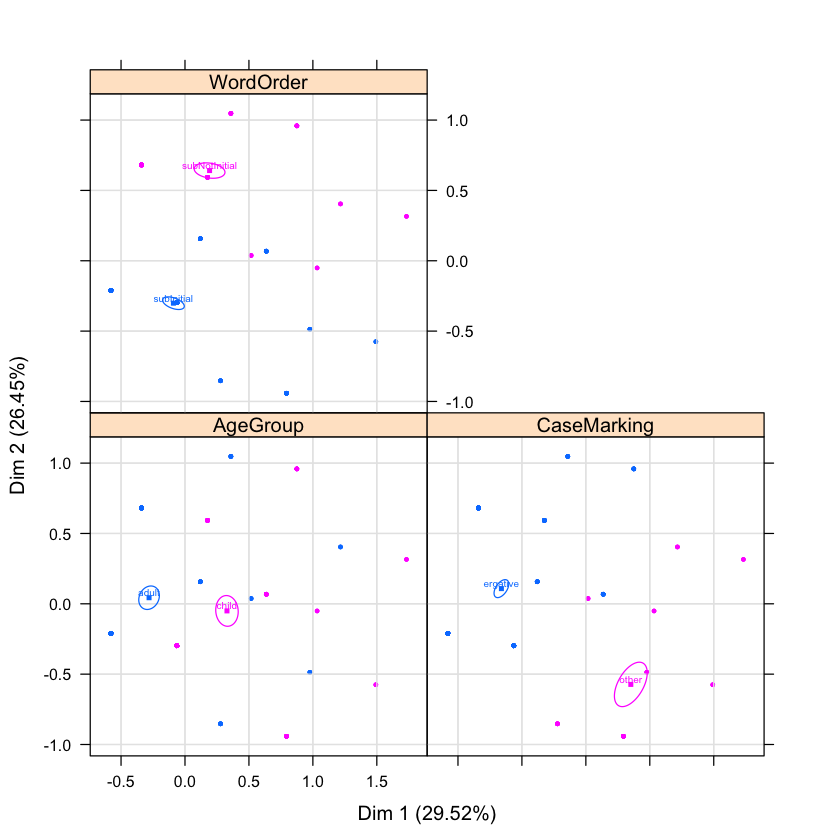

In [8]:
plotellipses(mca.object, keepvar=c(1:3), magnify = 1)

## Référence

Cours de Guillaume Desagulier intitulé linguistique outillée et traitements statistiques

https://corpling.modyco.fr/workshops/M2TAL/4.multivariate.html